In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression,Lasso,LassoCV,Ridge,RidgeCV,ElasticNet,ElasticNetCV,LogisticRegression
import seaborn as sns
sns.set()
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from patsy import dmatrices,demo_data
from sklearn import metrics




In [35]:
data=pd.read_csv('D:/INeuron/Fair.csv')

In [36]:
data

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs
0,1,male,37.0,10.00,no,3,18,7,4,0
1,2,female,27.0,4.00,no,4,14,6,4,0
2,3,female,32.0,15.00,yes,1,12,1,4,0
3,4,male,57.0,15.00,yes,5,18,6,5,0
4,5,male,22.0,0.75,no,2,17,6,3,0
...,...,...,...,...,...,...,...,...,...,...
596,597,male,22.0,1.50,yes,1,12,2,5,1
597,598,female,32.0,10.00,yes,2,18,5,4,7
598,599,male,32.0,10.00,yes,2,17,6,5,2
599,600,male,22.0,7.00,yes,3,18,6,2,2


In [37]:
data.columns

Index(['Unnamed: 0', 'sex', 'age', 'ym', 'child', 'religious', 'education',
       'occupation', 'rate', 'nbaffairs'],
      dtype='object')

In [39]:
data.dtypes

Unnamed: 0      int64
sex            object
age           float64
ym            float64
child          object
religious       int64
education       int64
occupation      int64
rate            int64
nbaffairs       int64
dtype: object

In [40]:
data['sex'].value_counts()

female    315
male      286
Name: sex, dtype: int64

In [41]:
#Adding affair column to the dataset
data['affair']=0

In [42]:
data

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,affair
0,1,male,37.0,10.00,no,3,18,7,4,0,0
1,2,female,27.0,4.00,no,4,14,6,4,0,0
2,3,female,32.0,15.00,yes,1,12,1,4,0,0
3,4,male,57.0,15.00,yes,5,18,6,5,0,0
4,5,male,22.0,0.75,no,2,17,6,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
596,597,male,22.0,1.50,yes,1,12,2,5,1,0
597,598,female,32.0,10.00,yes,2,18,5,4,7,0
598,599,male,32.0,10.00,yes,2,17,6,5,2,0
599,600,male,22.0,7.00,yes,3,18,6,2,2,0


In [43]:
data['affair']=np.where(data['nbaffairs']>0,1,0)

In [44]:
data['affair'].value_counts()

0    451
1    150
Name: affair, dtype: int64

In [45]:
data

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,affair
0,1,male,37.0,10.00,no,3,18,7,4,0,0
1,2,female,27.0,4.00,no,4,14,6,4,0,0
2,3,female,32.0,15.00,yes,1,12,1,4,0,0
3,4,male,57.0,15.00,yes,5,18,6,5,0,0
4,5,male,22.0,0.75,no,2,17,6,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...
596,597,male,22.0,1.50,yes,1,12,2,5,1,1
597,598,female,32.0,10.00,yes,2,18,5,4,7,1
598,599,male,32.0,10.00,yes,2,17,6,5,2,1
599,600,male,22.0,7.00,yes,3,18,6,2,2,1


In [46]:
data.dtypes

Unnamed: 0      int64
sex            object
age           float64
ym            float64
child          object
religious       int64
education       int64
occupation      int64
rate            int64
nbaffairs       int64
affair          int32
dtype: object

### Data Preprocessing

In [47]:
data['child']=np.where(data['child']=='yes',1,0)

In [48]:
data.dtypes

Unnamed: 0      int64
sex            object
age           float64
ym            float64
child           int32
religious       int64
education       int64
occupation      int64
rate            int64
nbaffairs       int64
affair          int32
dtype: object

In [53]:
sexdummies=pd.get_dummies(data['sex'],drop_first=True,prefix='sex')

In [54]:
sexdummies

,sex_male
0,1
1,0
2,0
3,1
4,1
...,...
596,1
597,0
598,1
599,1


In [56]:
data=pd.concat([data,sexdummies],axis=1)
data

,Unnamed: 0,sex,age,ym,child,religious,education,occupation,rate,nbaffairs,affair,sex_male
0,1,male,37.0,10.00,0,3,18,7,4,0,0,1
1,2,female,27.0,4.00,0,4,14,6,4,0,0,0
2,3,female,32.0,15.00,1,1,12,1,4,0,0,0
3,4,male,57.0,15.00,1,5,18,6,5,0,0,1
4,5,male,22.0,0.75,0,2,17,6,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
596,597,male,22.0,1.50,1,1,12,2,5,1,1,1
597,598,female,32.0,10.00,1,2,18,5,4,7,1,0
598,599,male,32.0,10.00,1,2,17,6,5,2,1,1
599,600,male,22.0,7.00,1,3,18,6,2,2,1,1


In [59]:
data.drop('sex',inplace=True,axis=1)

In [60]:
data

,Unnamed: 0,age,ym,child,religious,education,occupation,rate,nbaffairs,affair,sex_male
0,1,37.0,10.00,0,3,18,7,4,0,0,1
1,2,27.0,4.00,0,4,14,6,4,0,0,0
2,3,32.0,15.00,1,1,12,1,4,0,0,0
3,4,57.0,15.00,1,5,18,6,5,0,0,1
4,5,22.0,0.75,0,2,17,6,3,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
596,597,22.0,1.50,1,1,12,2,5,1,1,1
597,598,32.0,10.00,1,2,18,5,4,7,1,0
598,599,32.0,10.00,1,2,17,6,5,2,1,1
599,600,22.0,7.00,1,3,18,6,2,2,1,1


In [69]:
data.drop('Unnamed: 0',axis=1,inplace=True)

In [70]:
data.dtypes

age           float64
ym            float64
child           int32
religious       int64
education       int64
occupation      int64
rate            int64
nbaffairs       int64
affair          int32
sex_male        uint8
dtype: object

### Plotting the distributions of each feature variable

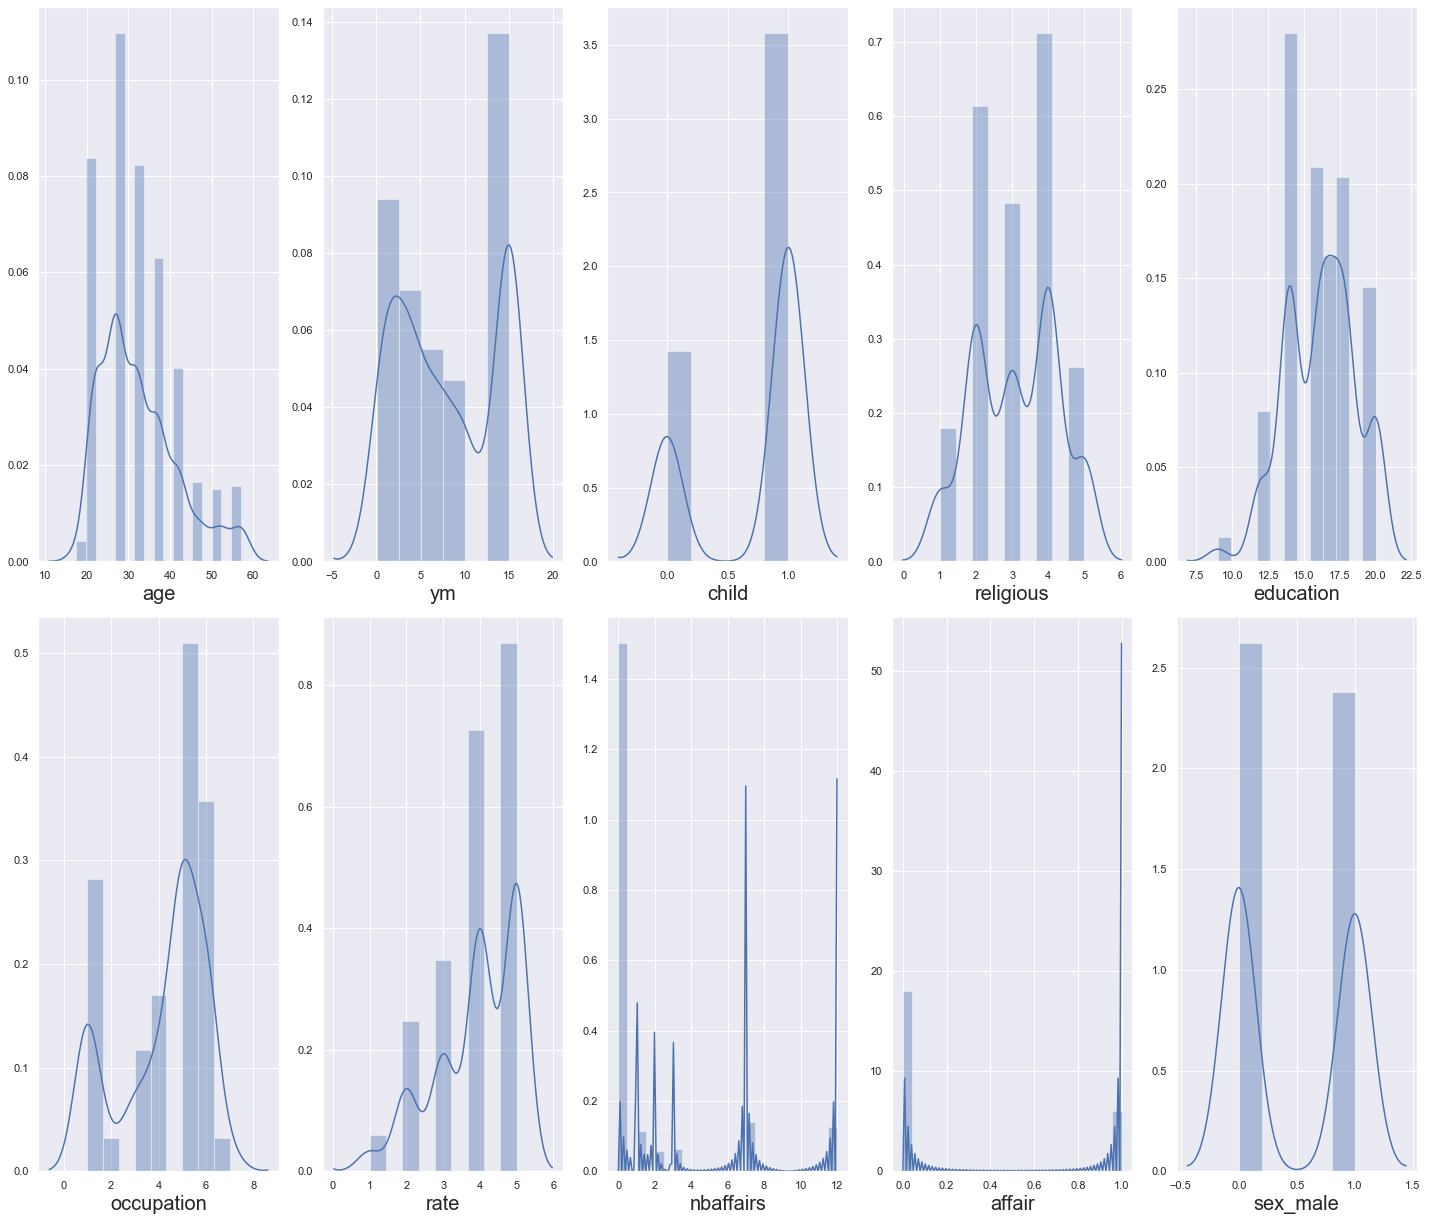

In [71]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for col in data:
    if plotnumber<12:
        ax=plt.subplot(3,5,plotnumber)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotnumber+=1
plt.tight_layout()
    

### Checking for outliers for each variable

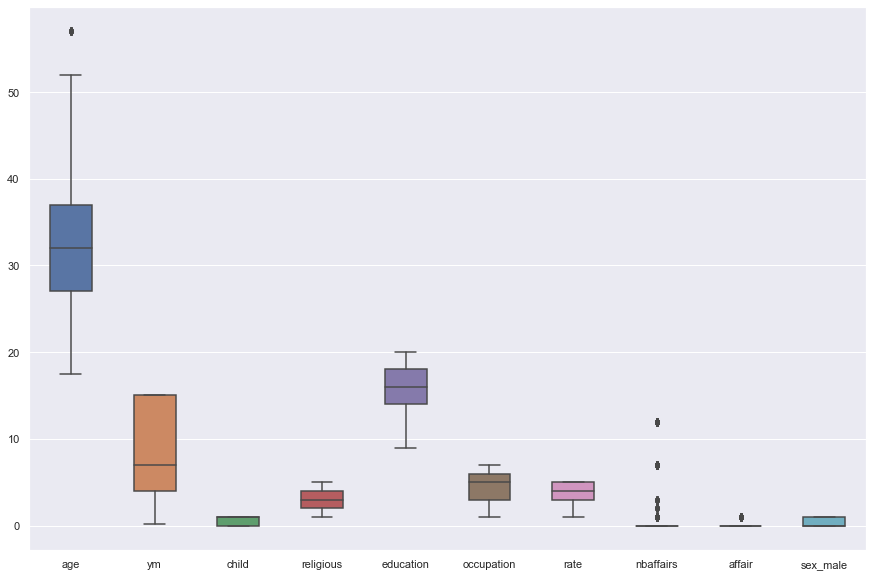

In [72]:
fig,axs=plt.subplots(figsize=(15,10))
sns.boxplot(data=data,ax=axs,width=0.5,fliersize=5)

### Dividing our data into x and y

In [73]:
x=data.drop('affair',axis=1)
y=data['affair']

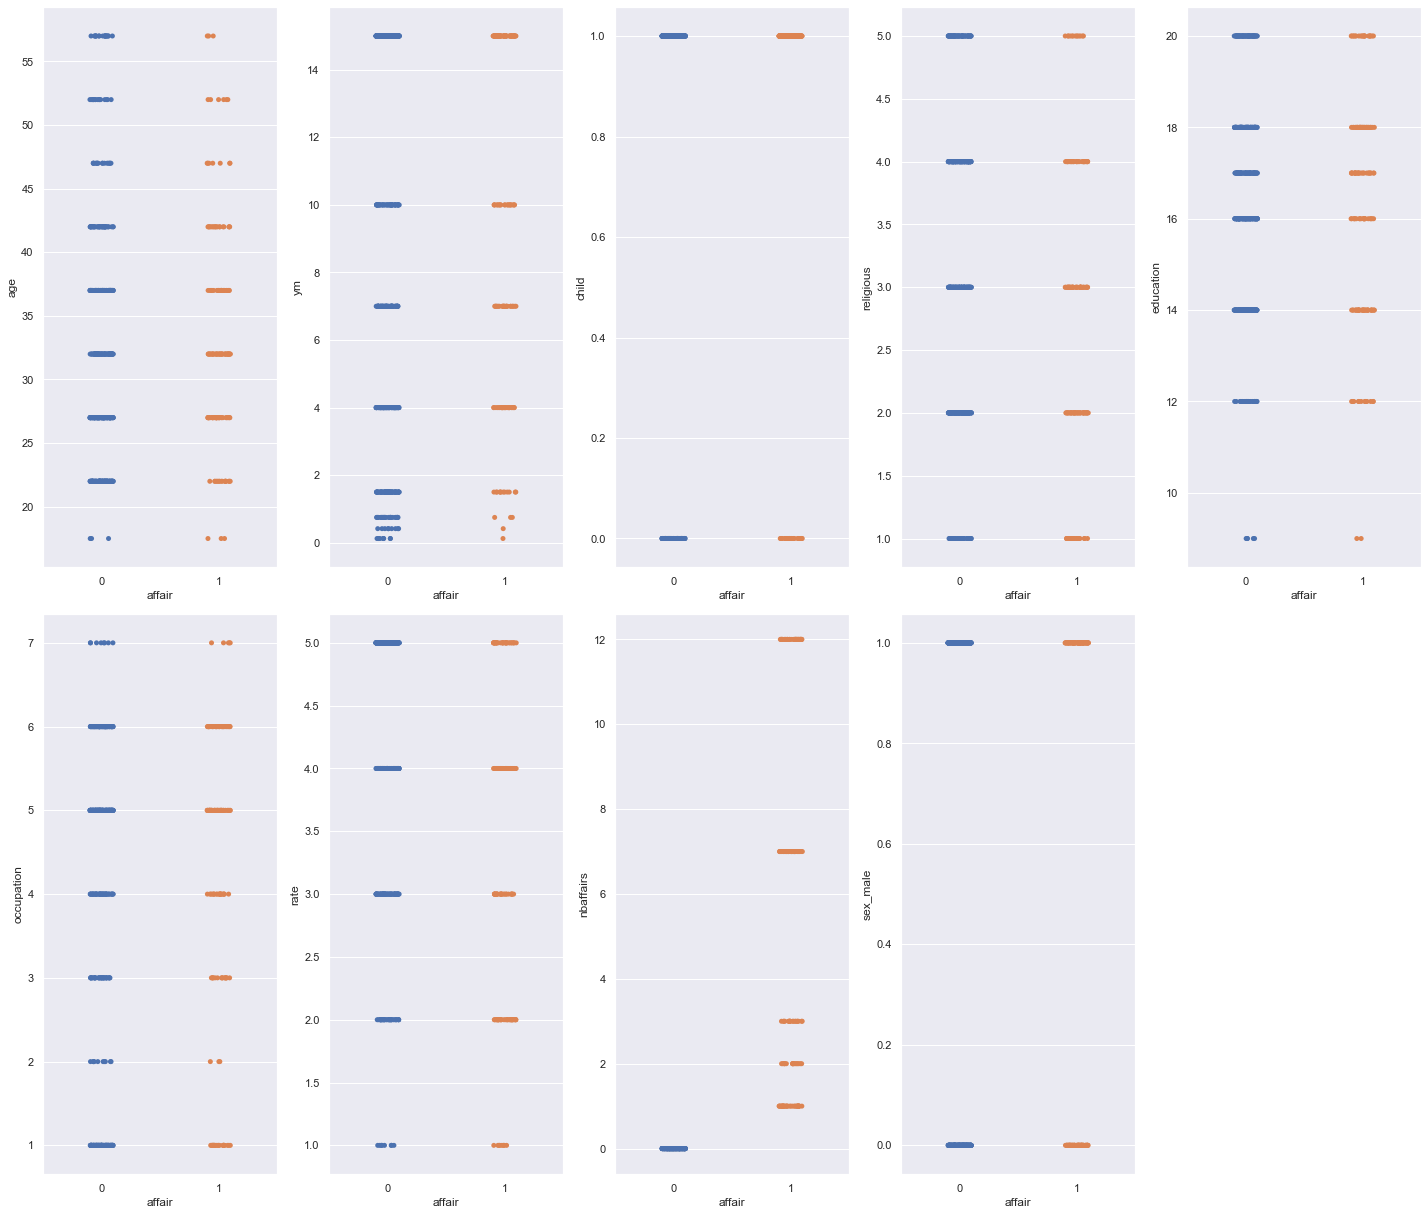

In [74]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for col in x:
    if plotnumber<12:
        ax=plt.subplot(3,5,plotnumber)
        sns.stripplot(y,x[col])
    plotnumber+=1
plt.tight_layout()
    

In [75]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

### Checking multicollinearity among feature variables

In [77]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif

,vif
0,2.789636
1,3.399568
2,1.567299
3,1.099069
4,1.487898
5,1.642465
6,1.163462
7,1.151726
8,1.413523


### Dividing our data into train and test

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=234)

In [81]:
lr=LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [82]:
y_pred=lr.predict(x_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

### Evaluating our model

In [83]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [84]:
confusionmatrix=confusion_matrix(y_test,y_pred)
confusionmatrix

array([[90,  0],
       [10, 21]], dtype=int64)

In [86]:
true_positive=confusionmatrix[0][0]
false_positive=confusionmatrix[0][1]
true_negative=confusionmatrix[1][0]
false_negative=confusionmatrix[1][1]

In [87]:
accuracy=(true_positive+true_negative)/(true_positive+false_positive+true_negative+false_negative)
accuracy

0.8264462809917356

In [88]:
recall=true_positive/(true_positive+false_negative)
recall

0.8108108108108109

In [89]:
precision=true_negative/(true_negative+false_positive)
precision

1.0

In [92]:
f1score=(2*accuracy*precision)/(accuracy+precision)
f1score

0.904977375565611

In [93]:
specificity=true_negative/(true_negative+false_positive)
specificity

1.0

In [94]:
falsepositiverate=(1-specificity)
falsepositiverate

0.0